# Task 2  

In [384]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

plt.style.use('default')
sns.set_theme()

df = pd.read_csv("Titanic_Dataset.csv")
df.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [385]:
df.info()
df.shape
df.describe()
print(df.value_counts())
df.isnull().sum()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          714 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     889 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB
PassengerId  Survived  Pclass  Name                                                 Sex     Age   SibSp  Parch  Ticket    Fare     Cabin        Embarked
2            1         1       Cumings, Mrs. John Bradley (Florence Briggs Thayer)  female 

PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age            177
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         2
dtype: int64

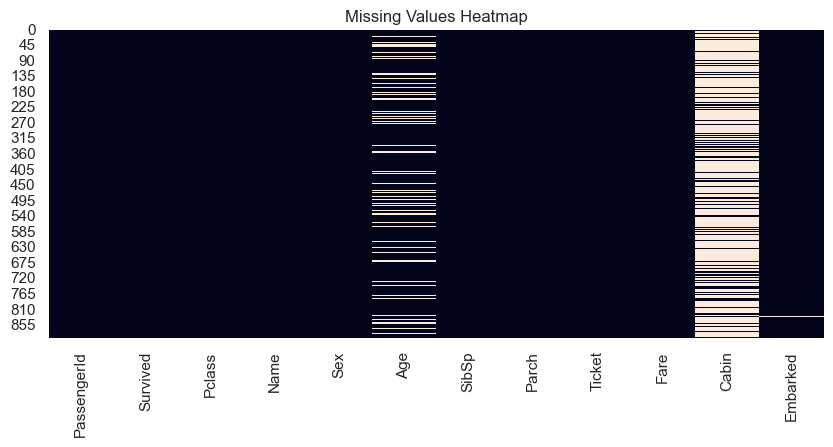

In [386]:
plt.figure(figsize=(10,4))
sns.heatmap(df.isnull(), cbar=False)
plt.title("Missing Values Heatmap")
plt.show()

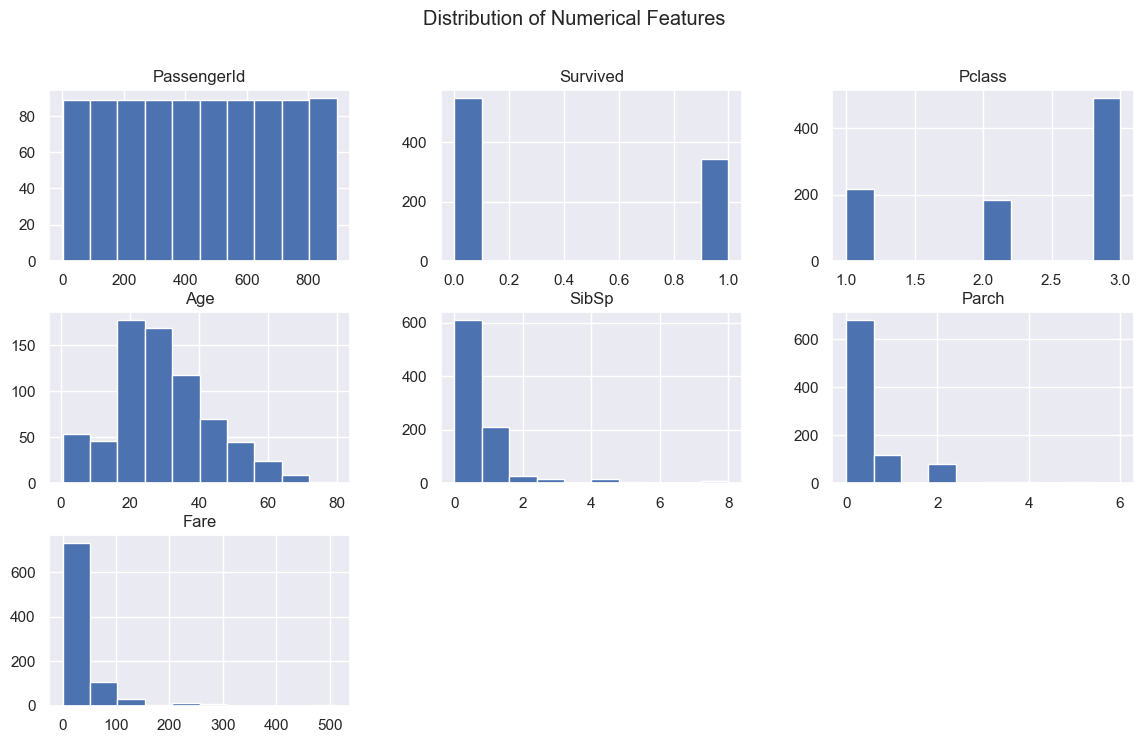

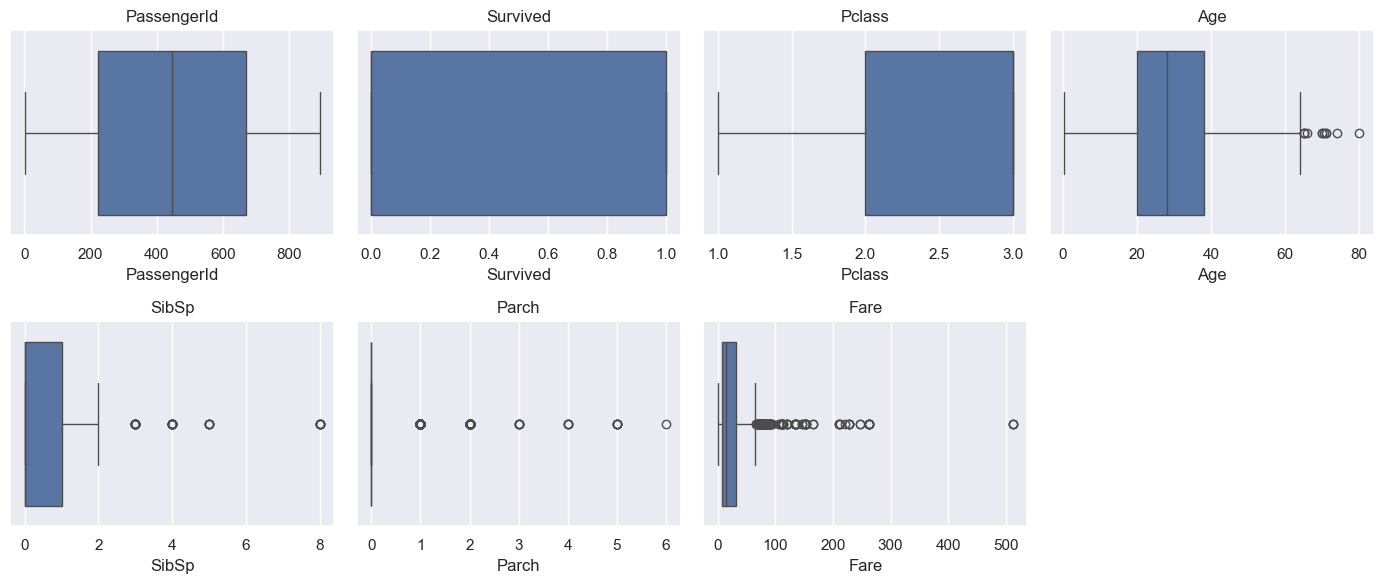

In [387]:
numeric_cols = df.select_dtypes(include=['int64','float64']).columns

df[numeric_cols].hist(figsize=(14,8))
plt.suptitle("Distribution of Numerical Features")
plt.show()

plt.figure(figsize=(14,6))
for i, col in enumerate(numeric_cols, 1):
    plt.subplot(2, 4, i)
    sns.boxplot(x=df[col])
    plt.title(col)
plt.tight_layout()
plt.show()


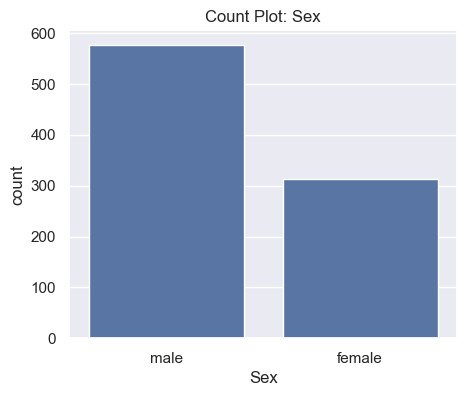

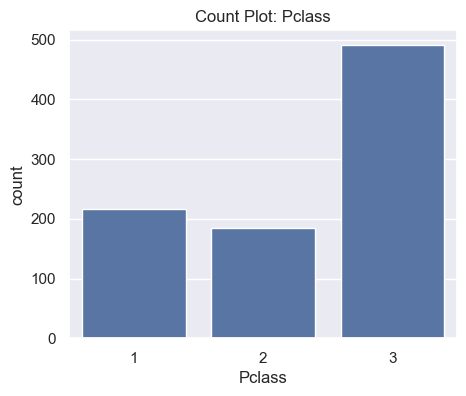

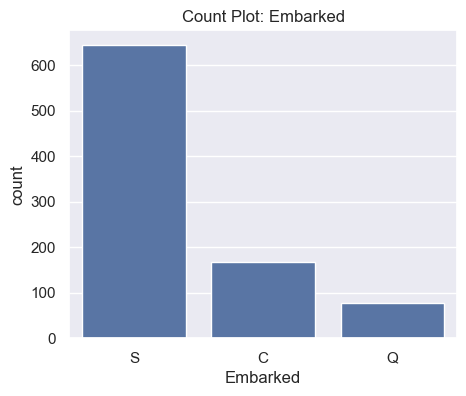

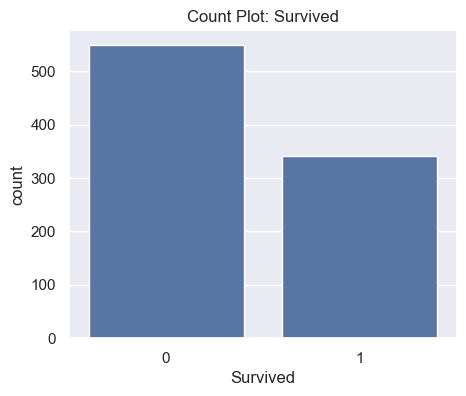

In [388]:
categorical_cols = ['Sex', 'Pclass', 'Embarked', 'Survived']
for col in categorical_cols:
    plt.figure(figsize=(5,4))
    sns.countplot(x=df[col])
    plt.title(f"Count Plot: {col}")
    plt.show()



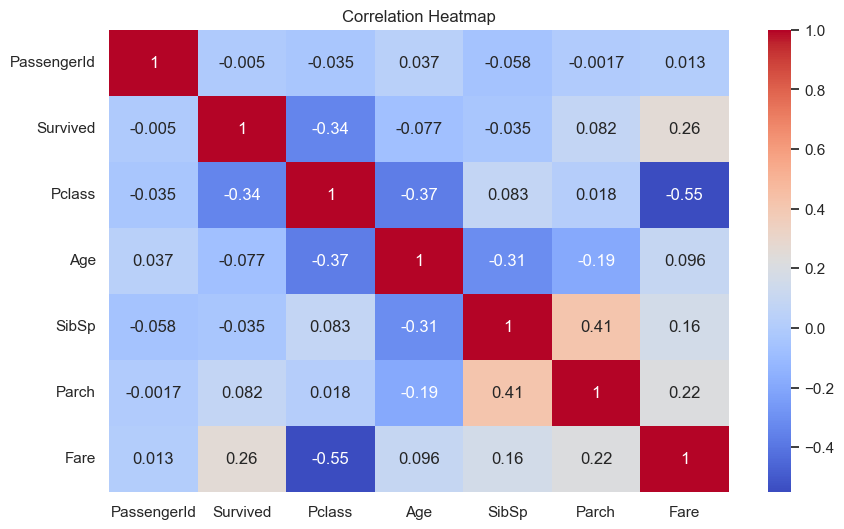

In [389]:
plt.figure(figsize=(10,6))
sns.heatmap(df.select_dtypes(include=['int64','float64']).corr(), annot=True, cmap="coolwarm")
plt.title("Correlation Heatmap")
plt.show()

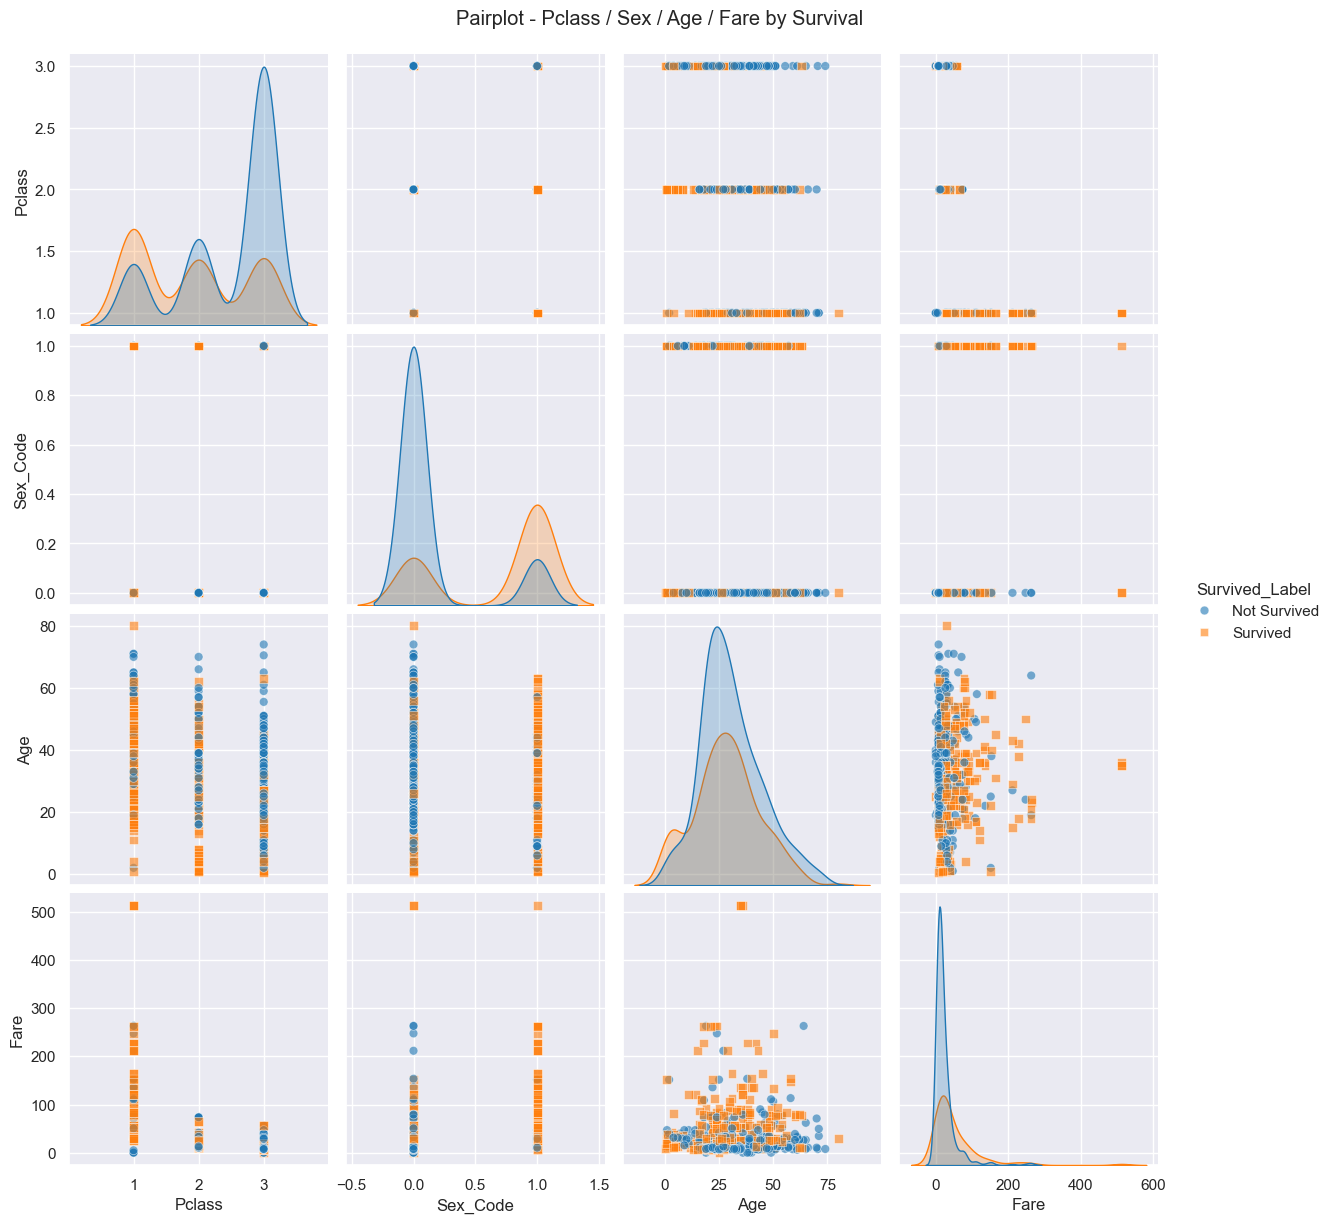

In [390]:
df['Survived_Label'] = df['Survived'].map({0: 'Not Survived', 1: 'Survived'})
df['Sex_Code'] = df['Sex'].map({'male': 0, 'female': 1})

vars_to_plot = ['Pclass', 'Sex_Code', 'Age', 'Fare']
df_pp = df[['Survived_Label'] + vars_to_plot].dropna()

palette = {'Not Survived': 'tab:blue', 'Survived': 'tab:orange'}

g = sns.pairplot(
    df_pp,hue='Survived_Label',
    vars=vars_to_plot,
    palette=palette,
    diag_kind='kde',
    plot_kws={'alpha': 0.6, 's': 40},
    diag_kws={'fill': True},
    markers=['o', 's'],
    height=3,
    aspect=1
)

g.figure.suptitle("Pairplot - Pclass / Sex / Age / Fare by Survival", y=1.02)
plt.show()


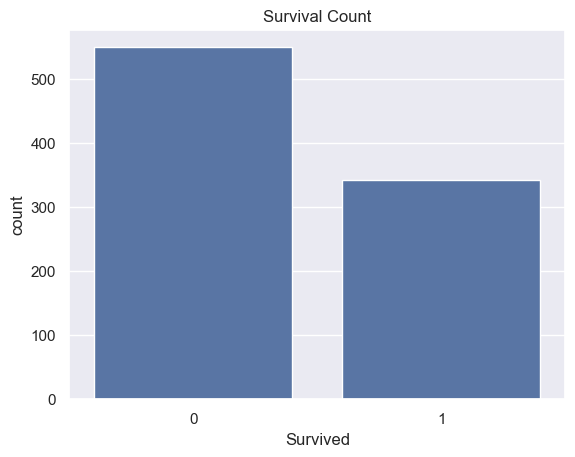

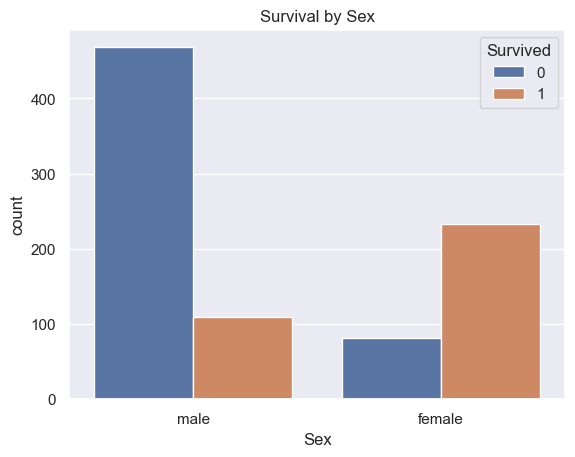

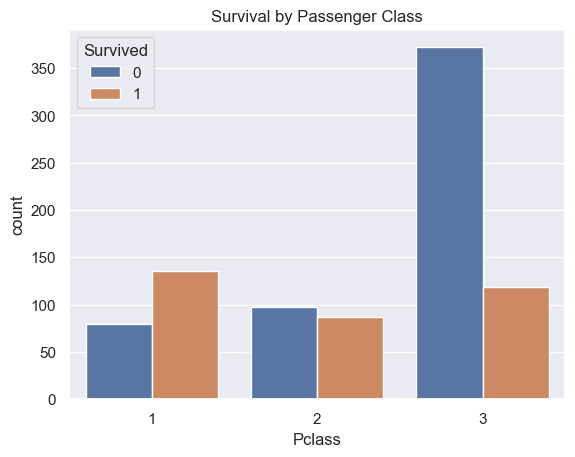

In [391]:
sns.countplot(x='Survived', data=df)
plt.title("Survival Count")
plt.show()

sns.countplot(x='Sex', hue='Survived', data=df)
plt.title("Survival by Sex")
plt.show()

sns.countplot(x='Pclass', hue='Survived', data=df)
plt.title("Survival by Passenger Class")
plt.show()


In [392]:
df.groupby("Pclass")["Survived"].mean()
df.groupby("Sex")["Survived"].mean()
df.groupby(["Pclass","Sex"])["Survived"].mean()


Pclass  Sex   
1       female    0.968085
        male      0.368852
2       female    0.921053
        male      0.157407
3       female    0.500000
        male      0.135447
Name: Survived, dtype: float64

Skewness:
 Fare           4.787317
SibSp          3.695352
Parch          2.749117
Survived       0.478523
Age            0.389108
PassengerId    0.000000
Pclass        -0.630548
dtype: float64


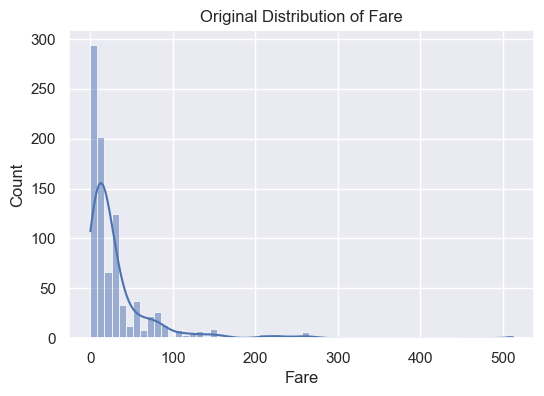

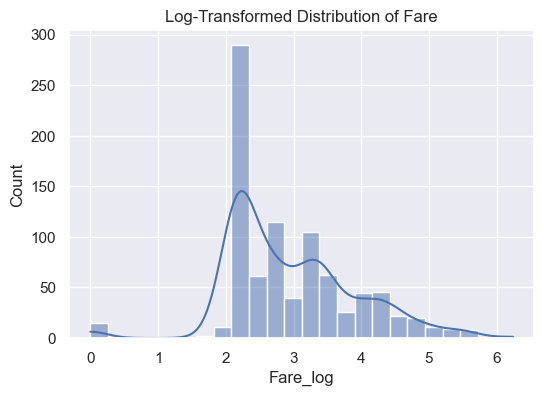

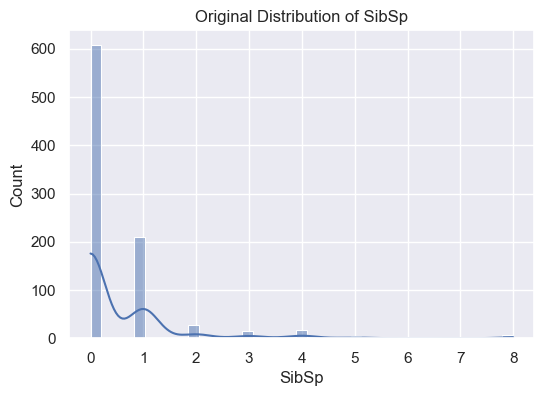

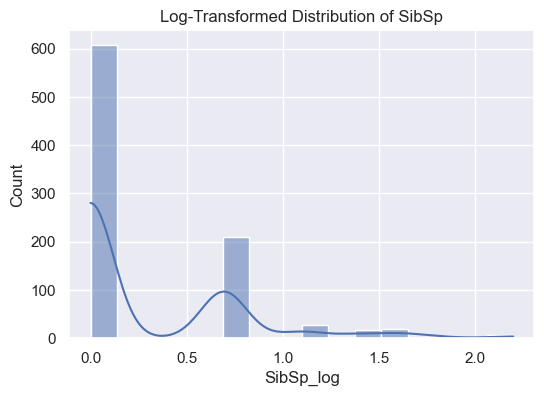

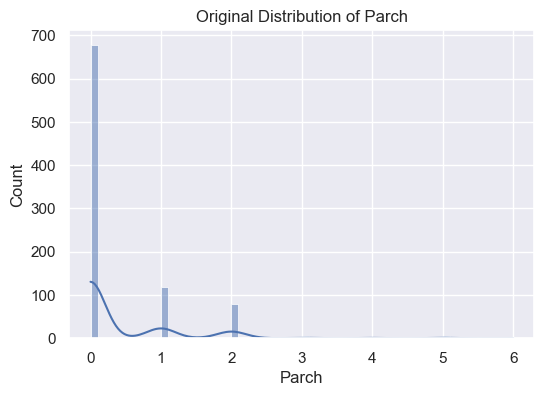

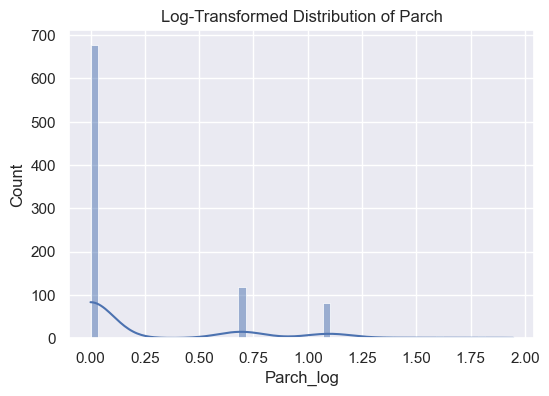

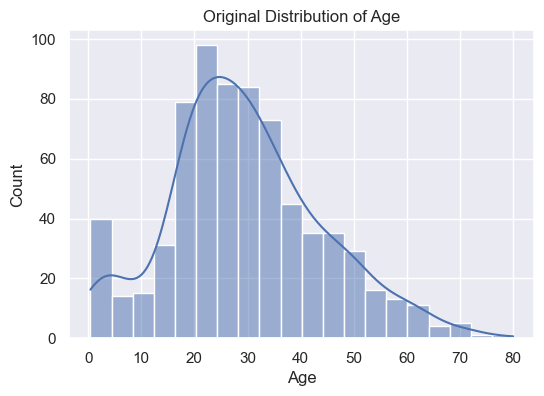

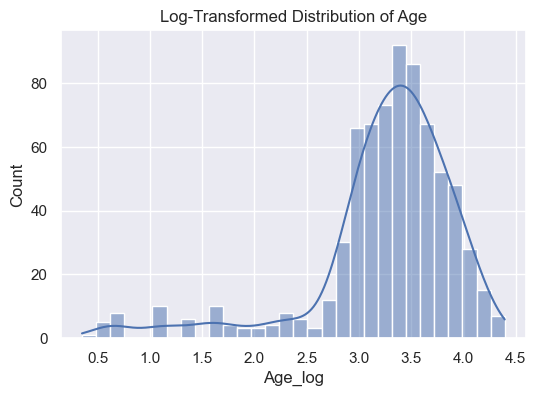

In [393]:
print("Skewness:\n", df[numeric_cols].skew().sort_values(ascending=False))

log_transform_cols = ['Fare', 'SibSp', 'Parch', 'Age']

for col in log_transform_cols:
    df[col + '_log'] = np.log1p(df[col])

for col in log_transform_cols:
    plt.figure(figsize=(6,4))
    sns.histplot(df[col], kde=True)
    plt.title(f"Original Distribution of {col}")
    plt.xlabel(col)
    plt.ylabel("Count")
    plt.show()

    plt.figure(figsize=(6,4))
    sns.histplot(df[col + '_log'], kde=True)
    plt.title(f"Log-Transformed Distribution of {col}")
    plt.xlabel(col + '_log')
    plt.ylabel("Count")
    plt.show()



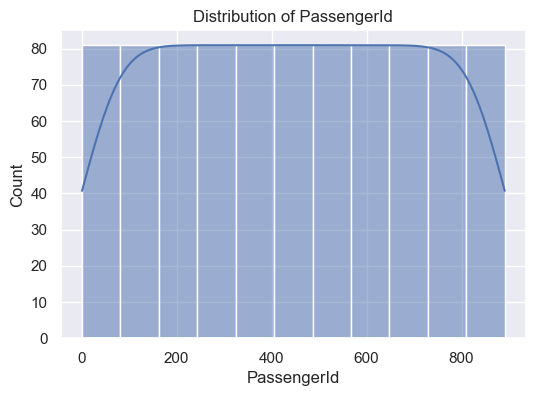

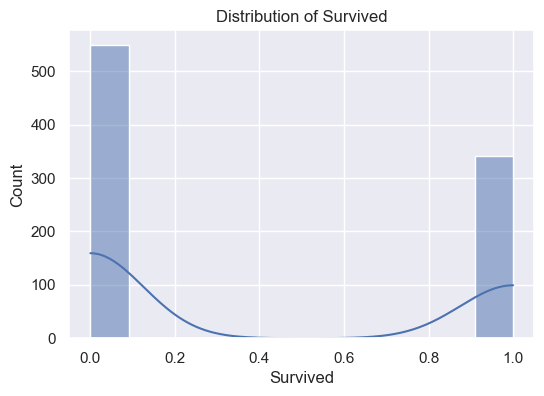

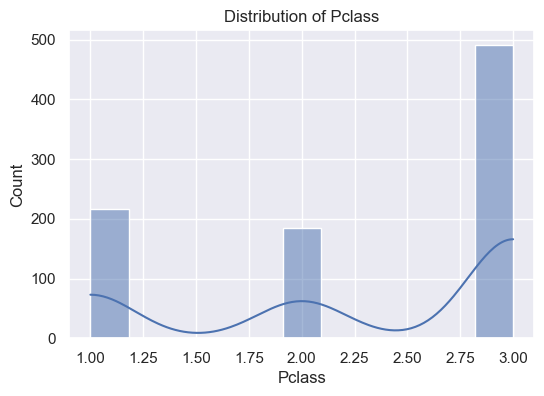

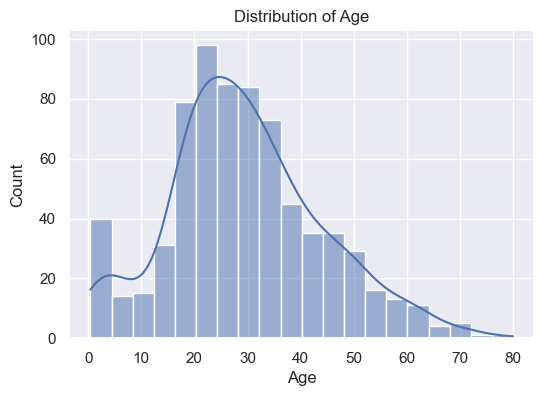

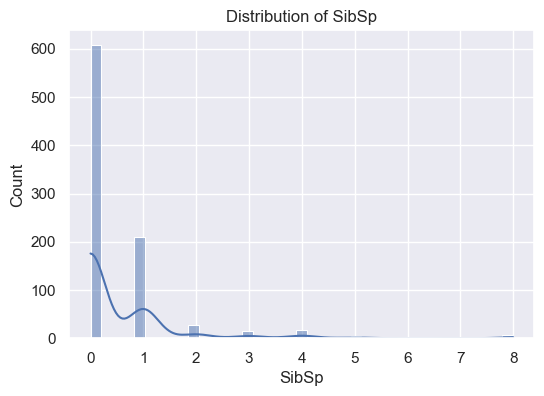

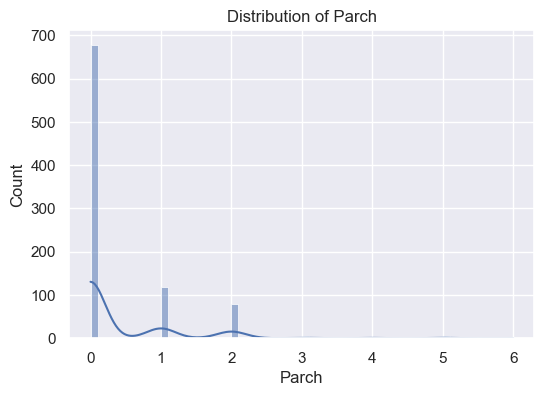

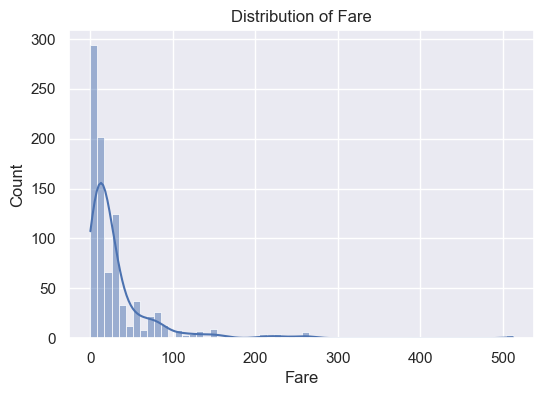

In [394]:
for col in numeric_cols:
    plt.figure(figsize=(6,4))
    sns.histplot(df[col], kde=True)
    plt.title(f"Distribution of {col}")
    plt.xlabel(col)
    plt.ylabel("Count")
    plt.show()
